# Imports

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Load Data

In [3]:
data = pd.read_csv('cleaned_dataset.csv')

# Feature Selection

In [4]:
# TODO: Category ?
features = ['Rating', 'Rating Count', 'Installs', 'Size', 'In app purchases']  # Add or remove features as necessary
X = data[features]
X.head()

,Rating,Rating Count,Installs,Size,In app purchases
0,4.090909,66.0,10000.0,5800000.0,False
1,4.000000,8.0,1000.0,5300000.0,False
2,3.866667,15.0,10000.0,5700000.0,False
3,4.000000,18.0,5000.0,5800000.0,False
4,4.023256,86.0,50000.0,5700000.0,False


In [5]:
# X = pd.get_dummies(X, columns=['Category'])
# X.head()

# Scaling
Standardize the data to ensure all features contribute equally to the distance calculations.

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for convenience
scaled_features_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_features_df.head()

,Rating,Rating Count,Installs,Size,In app purchases
0,0.512928,-0.051424,-0.071571,-0.598090,-0.568964
1,0.462432,-0.051673,-0.072665,-0.617142,-0.568964
2,0.388373,-0.051643,-0.071571,-0.601900,-0.568964
3,0.462432,-0.051630,-0.072178,-0.598090,-0.568964
4,0.475350,-0.051338,-0.066707,-0.601900,-0.568964


In [7]:
# Determine the optimal number of clusters using the Elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

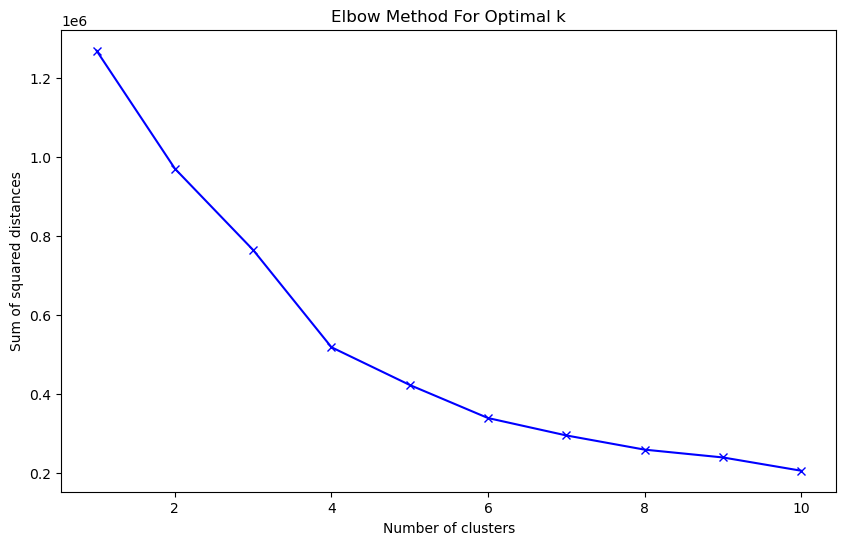

In [8]:
# Plot the Elbow method result
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
data['KMeans_Cluster'] = kmeans.labels_
y_kmeans = kmeans.fit_predict(X_scaled)

data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version,KMeans_Cluster
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,10000.0,10000.0,True,0.0,USD,...,False,False,Leading Online Learning and Training System in...,28.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656450e+18,1.1.5,1
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,1000.0,1000.0,True,0.0,USD,...,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656450e+18,1.2.3,1
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,10000.0,10000.0,True,0.0,USD,...,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656450e+18,1.1.5,1
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,5000.0,5000.0,True,0.0,USD,...,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656450e+18,1.1.4,1
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,50000.0,50000.0,True,0.0,USD,...,False,False,"Business Administration Learning, Business Adm...",29.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656450e+18,1.1.6,1


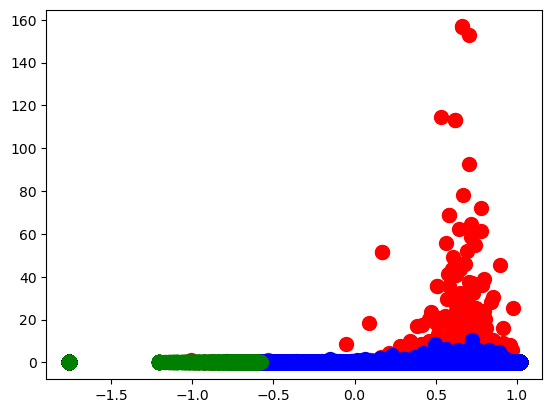

In [11]:
# 5. Plot the clusters
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

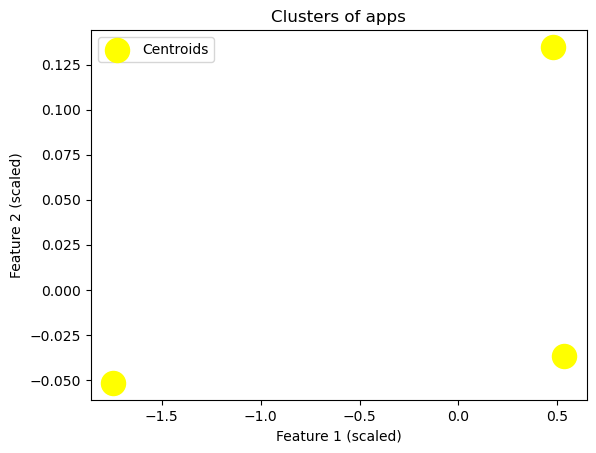

In [12]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of apps')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()